In [146]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### 画像の切り出し

In [147]:
# 画像の中心を切り出し
def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

# 長方形から最大サイズの正方形を切り出し
def crop_max_square(pil_img):
    return crop_center(pil_img, min(pil_img.size), min(pil_img.size))

In [148]:
img_org = Image.open('./images/A.jpg')

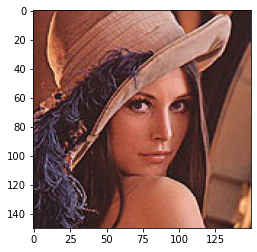

In [149]:
# 正方形を切り出し
img = crop_max_square(img_org)
img.save('images/A0.jpg', quality=95)
plt.imshow(np.array(img))

### RGB読み込み

In [161]:
img_array = np.asarray(img) #numpyで扱える配列をつくる
img_array.shape

(150, 150, 3)

画像配列は(行データ, 列データ, RGBデータ)<p>
0番目が赤(Red)のデータ<p>
1番目が緑(Green)のデータ<p>
2番目が青(Blue)のデータ<p>

In [162]:
print(img_array[1,1, :]) # 高さ=0, 幅=0のRGBの値を出力

[108  51  44]


R(赤) : 136 <br>
G(緑) : 137 <br>
B(青) : 141 <br>

In [163]:
img_array

array([[[112,  54,  50],
        [113,  54,  48],
        [113,  52,  47],
        ...,
        [ 54,  34,  35],
        [ 53,  33,  34],
        [ 50,  30,  31]],

       [[107,  52,  45],
        [108,  51,  44],
        [109,  50,  44],
        ...,
        [ 54,  34,  35],
        [ 52,  32,  33],
        [ 47,  29,  29]],

       [[105,  53,  42],
        [105,  50,  43],
        [110,  51,  45],
        ...,
        [ 52,  32,  33],
        [ 50,  32,  32],
        [ 47,  29,  29]],

       ...,

       [[ 51,  41,  40],
        [ 43,  33,  32],
        [ 39,  27,  29],
        ...,
        [237, 162, 105],
        [219, 144,  89],
        [179, 103,  53]],

       [[ 43,  33,  32],
        [ 38,  28,  29],
        [ 42,  30,  32],
        ...,
        [242, 161, 114],
        [206, 127,  88],
        [155,  81,  46]],

       [[ 41,  32,  33],
        [ 40,  30,  31],
        [ 43,  31,  33],
        ...,
        [230, 146, 112],
        [173,  93,  70],
        [114,  46,  27]]

In [176]:
# 赤(Red)のデータ加算
r = np.array([1, 0, 0]) #1次元配列の作成
r_tile = np.tile(r, (150, 150,1)) # 多次元配列にタイル化
r_tile

array([[[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        ...,
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]],

       [[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        ...,
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]],

       [[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        ...,
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]],

       ...,

       [[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        ...,
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]],

       [[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        ...,
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]],

       [[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        ...,
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]]])

(150, 150, 3)


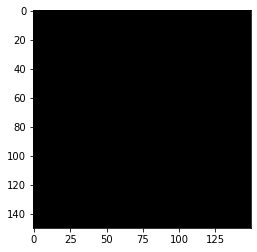

In [177]:
print(r_tile.shape)
plt.imshow(np.array(r_tile))

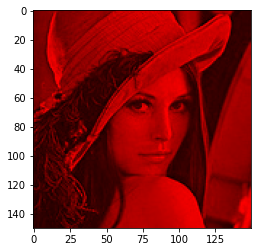

In [178]:
# 赤の抽出
plt.imshow(np.array(img_array * r_tile))

In [193]:
# RGB各色の最小値と最大値を取得。
print(img.getextrema()) 

((4, 255), (0, 249), (0, 243))


In [252]:
for i in range(1,256):
    # R 加算arrayの作成
    r = np.array([i, 0 ,0]) #１次元配列の作成
    r_tile = np.tile(r, (150,150,1)) # 多次元配列にタイル化
    temp_img = np.clip((img_array + r_tile), None, 255) #最大値255を指定
    pilImg = Image.fromarray(np.uint8(temp_img))
    pilImg.save("./images/A+" + '{0:03d}'.format(i) + ".jpg", quality=95)
else:
    print("for loop done")

for loop done


In [253]:
for i in range(1,256):
    # R 加算arrayの作成
    r = np.array([i, 0 ,0]) #１次元配列の作成
    r_tile = np.tile(r, (150,150,1)) # 多次元配列にタイル化
    temp_img = np.clip((img_array - r_tile), 0, None) #最大値255を指定
    pilImg = Image.fromarray(np.uint8(temp_img))
    pilImg.save("./images/A-" + '{0:03d}'.format(i) + ".jpg", quality=95)
else:
    print("for loop done")

for loop done


In [183]:
# 緑(Green)のデータ加算
g = np.array([0,1,0]) #１次元配列の作成
g_tile = np.tile(g, (150,150,1)) # 多次元配列にタイル化
g_tile

array([[[0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        ...,
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]],

       [[0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        ...,
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]],

       [[0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        ...,
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]],

       ...,

       [[0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        ...,
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]],

       [[0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        ...,
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]],

       [[0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        ...,
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0]]])

(150, 150, 3)


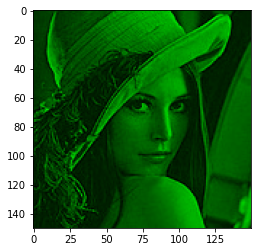

In [184]:
print(g_tile.shape)
plt.imshow(np.array(img_array * g_tile))

In [188]:
# 青(Blue)のデータ加算
b = np.array([0,0,1]) #１次元配列の作成
b_tile = np.tile(b, (150,150,1)) # 多次元配列にタイル化
b_tile

array([[[0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        ...,
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]],

       [[0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        ...,
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]],

       [[0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        ...,
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]],

       ...,

       [[0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        ...,
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]],

       [[0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        ...,
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]],

       [[0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        ...,
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]]])

(150, 150, 3)


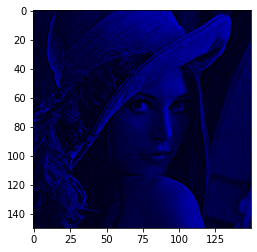

In [189]:
print(b_tile.shape)
plt.imshow(np.array(img_array * b_tile))

In [159]:
#書き込み出力
cv2.imwrite("A2.jpg", img_array2)

NameError: name 'img_array2' is not defined

In [160]:
# 画素へのアクセス
img_array = np.asarray(img[1,1]) # y座標1, x座標1の画素のBGR値を取得
print(img_array)

TypeError: 'Image' object is not subscriptable

In [ ]:
# 画素を色ごとに取得する
# pixelValue = img[Y座標, X座標, 色]
# 色は0:B 1:G: 2:R


In [32]:
# 画素へのアクセス
img_array = np.asarray(img) # y座標1, x座標1の画素のBGR値を取得
print(img_array[:,:,0])

[[149 149 148 ... 140 140 140]
 [148 148 148 ... 141 140 140]
 [147 147 147 ... 139 139 139]
 ...
 [143 142 142 ... 174 174 173]
 [143 142 142 ... 174 173 173]
 [143 142 142 ... 175 175 175]]


### グラフ化
Matplotlibで画像のヒストグラムを可視化<br>
https://note.nkmk.me/python-matplotlib-histogram/

([<matplotlib.axis.XTick at 0x190c7da9a88>,
 <a list of 9 Text xticklabel objects>)

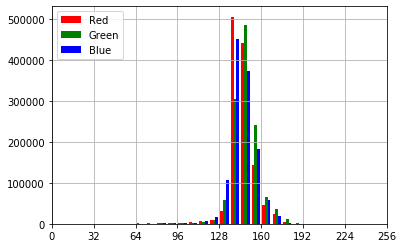

In [34]:
r = np.array(img)[:, :, 0].flatten()
g = np.array(img)[:, :, 1].flatten()
b = np.array(img)[:, :, 2].flatten()

bins_range = range(0, 257, 8)
xtics_range = range(0, 257, 32)

plt.hist((r, g, b), bins=bins_range,
         color=['r', 'g', 'b'], label=['Red', 'Green', 'Blue'])
plt.legend(loc=2)

plt.grid(True)

[xmin, xmax, ymin, ymax] = plt.axis()
plt.axis([0, 256, 0, ymax])
plt.xticks(xtics_range)

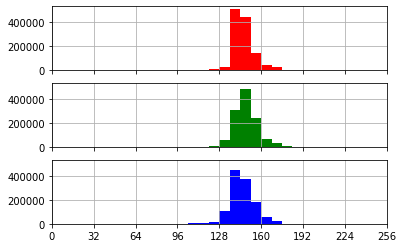

In [36]:
r = np.array(img)[:, :, 0].flatten()
g = np.array(img)[:, :, 1].flatten()
b = np.array(img)[:, :, 2].flatten()

bins_range = range(0, 257, 8)
xtics_range = range(0, 257, 32)

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True)

ax0.hist(r, bins=bins_range, color='r')
ax1.hist(g, bins=bins_range, color='g')
ax2.hist(b, bins=bins_range, color='b')

plt.setp((ax0, ax1, ax2), xticks=xtics_range, xlim=(0, 256))
ax0.grid(True)
ax1.grid(True)
ax2.grid(True)